In [1]:
import pandas as pd
from sqlalchemy import create_engine
from config import password

In [2]:
user = "postgres"
host = "localhost"
port = "5432"
db = "Employee_HW"
uri = f"postgresql://{user}:{password}@{host}:{port}/{db}"

In [3]:
engine = create_engine(uri)

In [4]:
conn = engine.connect()

In [5]:
salaries = pd.read_sql("SELECT * FROM salaries", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)

In [6]:
merge_table = pd.merge(salaries, titles, on="emp_no")

Text(0, 0.5, 'Counts')

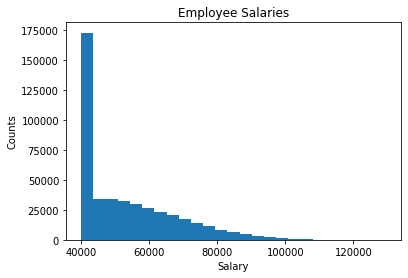

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

sal = merge_table.salary

sal.plot.hist(bins=25)

plt.title('Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Counts')

In [8]:
title_group = merge_table.groupby('title')

In [9]:
avg_salary = title_group['salary'].mean()

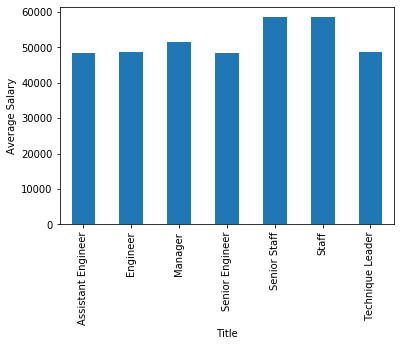

<Figure size 432x288 with 0 Axes>

In [10]:
avg_salary_chart = avg_salary.plot(kind='bar')

avg_salary_chart.set_xlabel("Title")
avg_salary_chart.set_ylabel("Average Salary")

plt.show()
plt.tight_layout()